# Dataset Plots

Contents
1.   [Libraries](#cell-1)
2.   [Aggregation Matrix Plots](#cell-2)
3.   [Dataset Series Plots](#cell-3)

<a href="https://colab.research.google.com/github/kdgutier/hint/blob/main/nbs/dataset_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="cell-1"></a>
# 1. Libraries

In [1]:
%%capture
!pip install -U numba statsforecast datasetsforecast
!pip install git+https://github.com/Nixtla/neuralforecast.git
!pip install git+https://github.com/Nixtla/hierarchicalforecast.git
!git clone https://github.com/dluuo/HINT.git

In [2]:
import os
import re
import numpy as np
import pandas as pd

#import wrangled datasets
from HINT.src.data.data import HierarchicalDataset

from hierarchicalforecast.utils import HierarchicalPlot

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib import rcParams
plt.rcParams['font.family'] = 'serif'

In [3]:
total_uids = {'Labour': '[\'Total\']', 
              'Traffic': 'Total',
              'TourismSmall': 'total',
              'TourismLarge': 'TotalAll',
              'Wiki2': 'Total'}

<a name="cell-2"></a>
# 2. Aggregation Matrix Plots

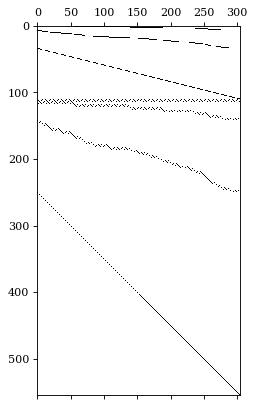

In [4]:
dataset = 'TourismLarge'
u_id = total_uids[dataset]

hdataset = HierarchicalDataset()
data = hdataset.load_process_data(dataset=dataset)
Y_df = data['Y_df'][data['Y_df']['y'].notna()][["unique_id", 'ds', 'y']]
Y_df['ds'] = pd.to_datetime(Y_df['ds'])
S_df, tags = data['S_df'], data['tags']
horizon = data['horizon']
seasonality = data['seasonality']
freq = data['freq']

#| hide
hplots = HierarchicalPlot(S=S_df, tags=tags)
hplots.plot_summing_matrix()

<a name="cell-3"></a>
# 3. Dataset Series Plots

In [5]:
x_axis_periods = {
            'Labour': 'Period [January 01, 2014 to December 01, 2019]', 
           'Traffic': 'Period [November 19, 2008 to December 31, 2008]',
      'TourismSmall': 'Period [January 31, 2001 to December 31, 2006]',
      'TourismLarge': 'Period [January 01, 2011 to December 01, 2016]',
             'Wiki2': 'Period [November 19, 2016 to December 31, 2016]'
}
x_axis_ticks = {
            'Labour': ['2014-12-01', '2016-12-01', '2018-12-01'], 
           'Traffic': ['2008-11-26', '2008-12-10', '2008-12-24'],
      'TourismSmall': ['2002-01-31', '2004-01-31', '2006-01-31'],
      'TourismLarge': ['2011-12-01', '2013-12-01', '2015-12-01'],
             'Wiki2': ['2016-11-26', '2016-12-10', '2016-12-24']
}
y_axis_labels = {
            'Labour': 'Employment Rate', 
           'Traffic': 'Occupancy Rate',
      'TourismSmall': 'Tourist Visits',
      'TourismLarge': 'Tourist Visits',
             'Wiki2': 'Daily Views'
}
y_axis_scalar = {
            'Labour': 100, 
           'Traffic': 100,
      'TourismSmall': 1000,
      'TourismLarge': 1000,
             'Wiki2': 10000
}

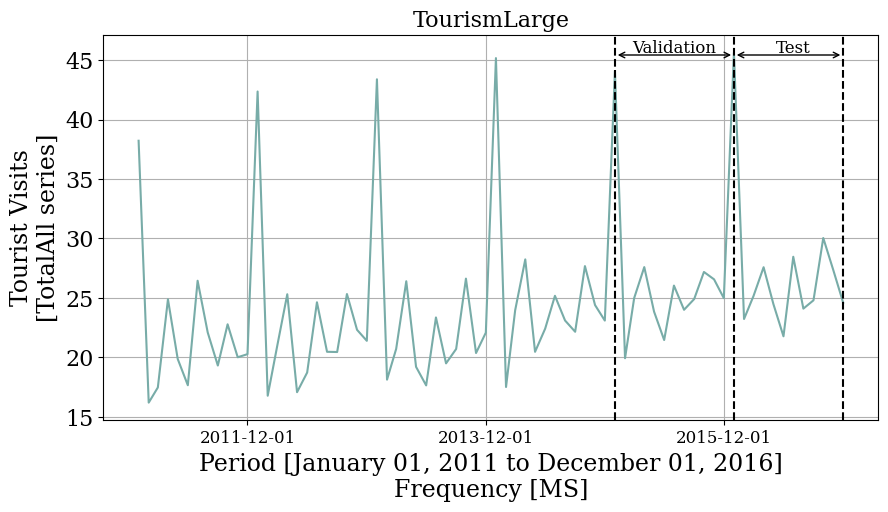

In [6]:
n_time = len(Y_df.ds.unique())
val_size = horizon
test_size = horizon
n_ds = horizon * 6

x_plot = pd.to_datetime(Y_df[Y_df.unique_id==u_id].ds)
y_plot = Y_df[Y_df.unique_id==u_id].y.values/y_axis_scalar[dataset]
x_val = x_plot[n_time - test_size - val_size]
x_test = x_plot[n_time - test_size]
x_val_mid = x_plot[n_time - test_size - val_size//2]
x_test_mid = x_plot[n_time - test_size//2]
x_max = x_plot[n_time - 1]
y_max = np.max(y_plot[-6*horizon:])

fig = plt.figure(figsize=(10, 5))
fig.tight_layout()

plt.plot(x_plot[-n_ds:], y_plot[-n_ds:], color='#78ACA8')
plt.xlabel(x_axis_periods[dataset] + f"\nFrequency [{freq}]", fontsize=17)
plt.xticks(x_axis_ticks[dataset], size = 12)
plt.ylabel(y_axis_labels[dataset] + f'\n[{u_id} series]', fontsize=17)
plt.yticks(size = 16)


plt.title(label=dataset, fontsize = 16)
plt.axvline(x_val, color='black', linestyle='dashed')
plt.axvline(x_test, color='black', linestyle='dashed')
plt.axvline(x_max, color='black', linestyle='dashed')

plt.text(x=x_val_mid, y=y_max, horizontalalignment='center', s='Validation', fontsize=12)
plt.text(x=x_test_mid, y=y_max, horizontalalignment='center', s='Test', fontsize=12)
plt.annotate(text='', xy=(x_val,y_max-0.2), xytext=(x_test,y_max-0.2), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='', xy=(x_test,y_max-0.2), xytext=(x_max,y_max-0.2), arrowprops=dict(arrowstyle='<->'))

plt.grid()

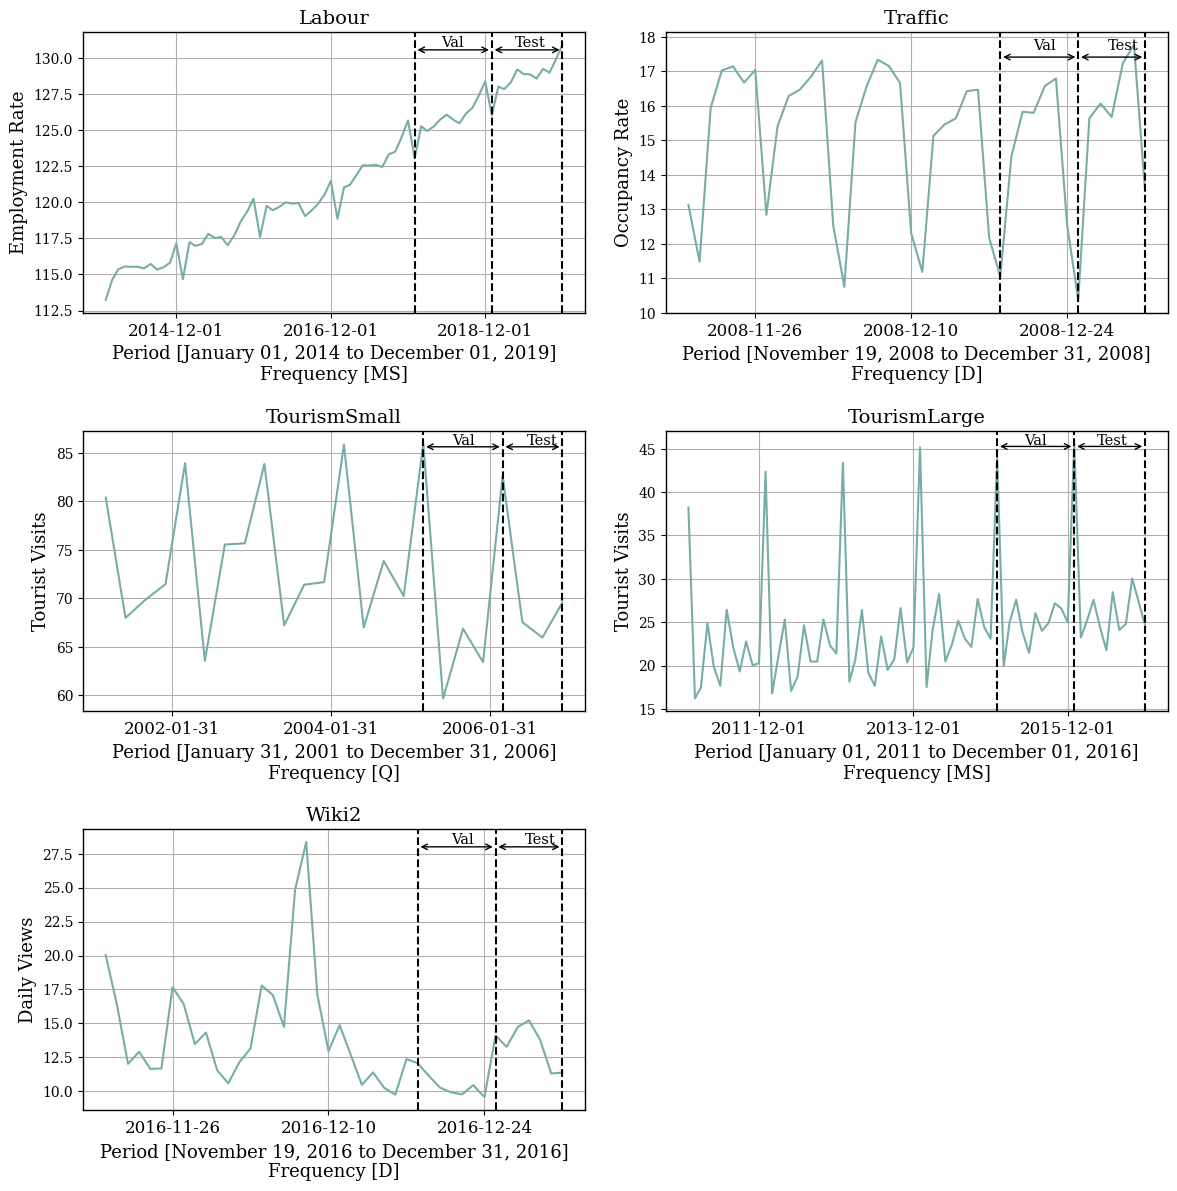

In [7]:
#Plot all Five Datasets
dataset_list = ['Labour', 'Traffic', 'TourismSmall', 'TourismLarge', 'Wiki2']

fig, axs = plt.subplots(3, 2, figsize=(14, 14))
fig.subplots_adjust(wspace=0.16, hspace=0.42)

#change border of subplots
for ax in axs.flatten():
    for spine in ['top', 'right', 'bottom', 'left']:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color('black')
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
        ax.xaxis.set_tick_params(labelsize=12)
        
# to remove last plot
axs.flat[-1].set_visible(False) 
        
#create each subplot
for idx in range(5):
    r, c = idx//2,idx%2
    
    #import dataset
    dataset = dataset_list[idx]
    u_id = total_uids[dataset]

    hdataset = HierarchicalDataset()
    data = hdataset.load_process_data(dataset=dataset)
    Y_df = data['Y_df'][data['Y_df']['y'].notna()].reset_index()[["unique_id", 'ds', 'y']]
    Y_df['ds'] = pd.to_datetime(Y_df['ds'])
    S_df, tags = data['S_df'], data['tags']
    horizon = data['horizon']
    seasonality = data['seasonality']
    freq = data['freq']

    n_time = len(Y_df.ds.unique())
    val_size = horizon
    test_size = horizon
    n_ds = horizon * 6

    x_plot = pd.to_datetime(Y_df[Y_df.unique_id==u_id].ds)
    y_plot = Y_df[Y_df.unique_id==u_id].y.values/y_axis_scalar[dataset]

    x_val = x_plot[n_time - test_size - val_size]
    x_test = x_plot[n_time - test_size]
    x_val_mid = x_plot[n_time - test_size - val_size//2]
    x_test_mid = x_plot[n_time - test_size//2]
    x_max = x_plot[n_time - 1]
    y_max = np.max(y_plot[-6*horizon:])

    axs[r,c].plot(x_plot[-n_ds:], y_plot[-n_ds:], color='#78ACA8')
    axs[r,c].set_xlabel(x_axis_periods[dataset] + f"\nFrequency [{freq}]", fontsize = 13)
    axs[r,c].set_xticks(x_axis_ticks[dataset]) 
    
    axs[r,c].set_ylabel(y_axis_labels[dataset], fontsize = 13)

    axs[r,c].set_title(label=dataset, fontsize=14)
    axs[r,c].axvline(x_val, color='black', linestyle='dashed')
    axs[r,c].axvline(x_test, color='black', linestyle='dashed')
    axs[r,c].axvline(x_max, color='black', linestyle='dashed')

    axs[r,c].text(x=x_val_mid, y=y_max-0.15, horizontalalignment='center', s='Val', fontsize=10.5)
    axs[r,c].text(x=x_test_mid, y=y_max-0.15, horizontalalignment='center', s='Test', fontsize=10.5)
    axs[r,c].annotate(text='', xy=(x_val,y_max-0.36), xytext=(x_test,y_max-0.36), arrowprops=dict(arrowstyle='<->'))
    axs[r,c].annotate(text='', xy=(x_test,y_max-0.36), xytext=(x_max,y_max-0.36), arrowprops=dict(arrowstyle='<->'))

    axs[r,c].grid()

In [8]:
fig.savefig('./data/FiveDatasetsPlots.pdf', bbox_inches='tight', pad_inches = 0.01)